# IMPORT LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
nrows=5000

# DATA UPLOAD

In [3]:
df = pd.read_csv("D:\\AI & ML\\library\\ASSIGNMENT\\AQI_IND.csv",nrows=nrows)

# DATA PREPROCESSING

In [4]:
df.fillna(method='ffill', inplace=True)
print(df.head)

<bound method NDFrame.head of            City        Date  PM2.5    PM10     NO    NO2    NOx    NH3     CO  \
0     Ahmedabad  01-01-2015    NaN     NaN   0.92  18.22  17.15    NaN   0.92   
1     Ahmedabad  02-01-2015    NaN     NaN   0.97  15.69  16.46    NaN   0.97   
2     Ahmedabad  03-01-2015    NaN     NaN  17.40  19.30  29.70    NaN  17.40   
3     Ahmedabad  04-01-2015    NaN     NaN   1.70  18.48  17.97    NaN   1.70   
4     Ahmedabad  05-01-2015    NaN     NaN  22.10  21.42  37.76    NaN  22.10   
...         ...         ...    ...     ...    ...    ...    ...    ...    ...   
4995  Bengaluru  02-12-2016  22.14   78.55  10.95  26.06   0.00  30.00   0.72   
4996  Bengaluru  03-12-2016  18.30  102.86  14.52  30.35   0.00  37.49   0.82   
4997  Bengaluru  04-12-2016  24.44  136.05  10.40  23.20   0.00  28.44   1.66   
4998  Bengaluru  05-12-2016  23.63  124.78  14.40  30.20   0.00  29.23   2.95   
4999  Bengaluru  06-12-2016  36.97  155.51  14.79  44.45   0.00  27.60   1.70  

In [5]:
x=df.iloc[:,2:-1]
y=df.iloc[:,15:]

In [6]:
# check for missing values
print('Missing Values:', x.isnull().sum())

# fill missing values with mean
x = x.fillna(x.mean())
y = y.fillna(y.mean())
# check for missing values after filling with mean
print('Missing Values After Filling with Mean:', x.isnull().sum())

Missing Values: PM2.5        27
PM10       1594
NO            0
NO2           0
NOx           0
NH3        2009
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI          28
dtype: int64
Missing Values After Filling with Mean: PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_24724\1879237715.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  y = y.fillna(y.mean())


In [7]:
y = y.astype(str)
x = x.astype(str)


In [8]:
print(y.shape)
print(x.shape)

(5000, 1)
(5000, 13)


# DATA VISULAIZATION

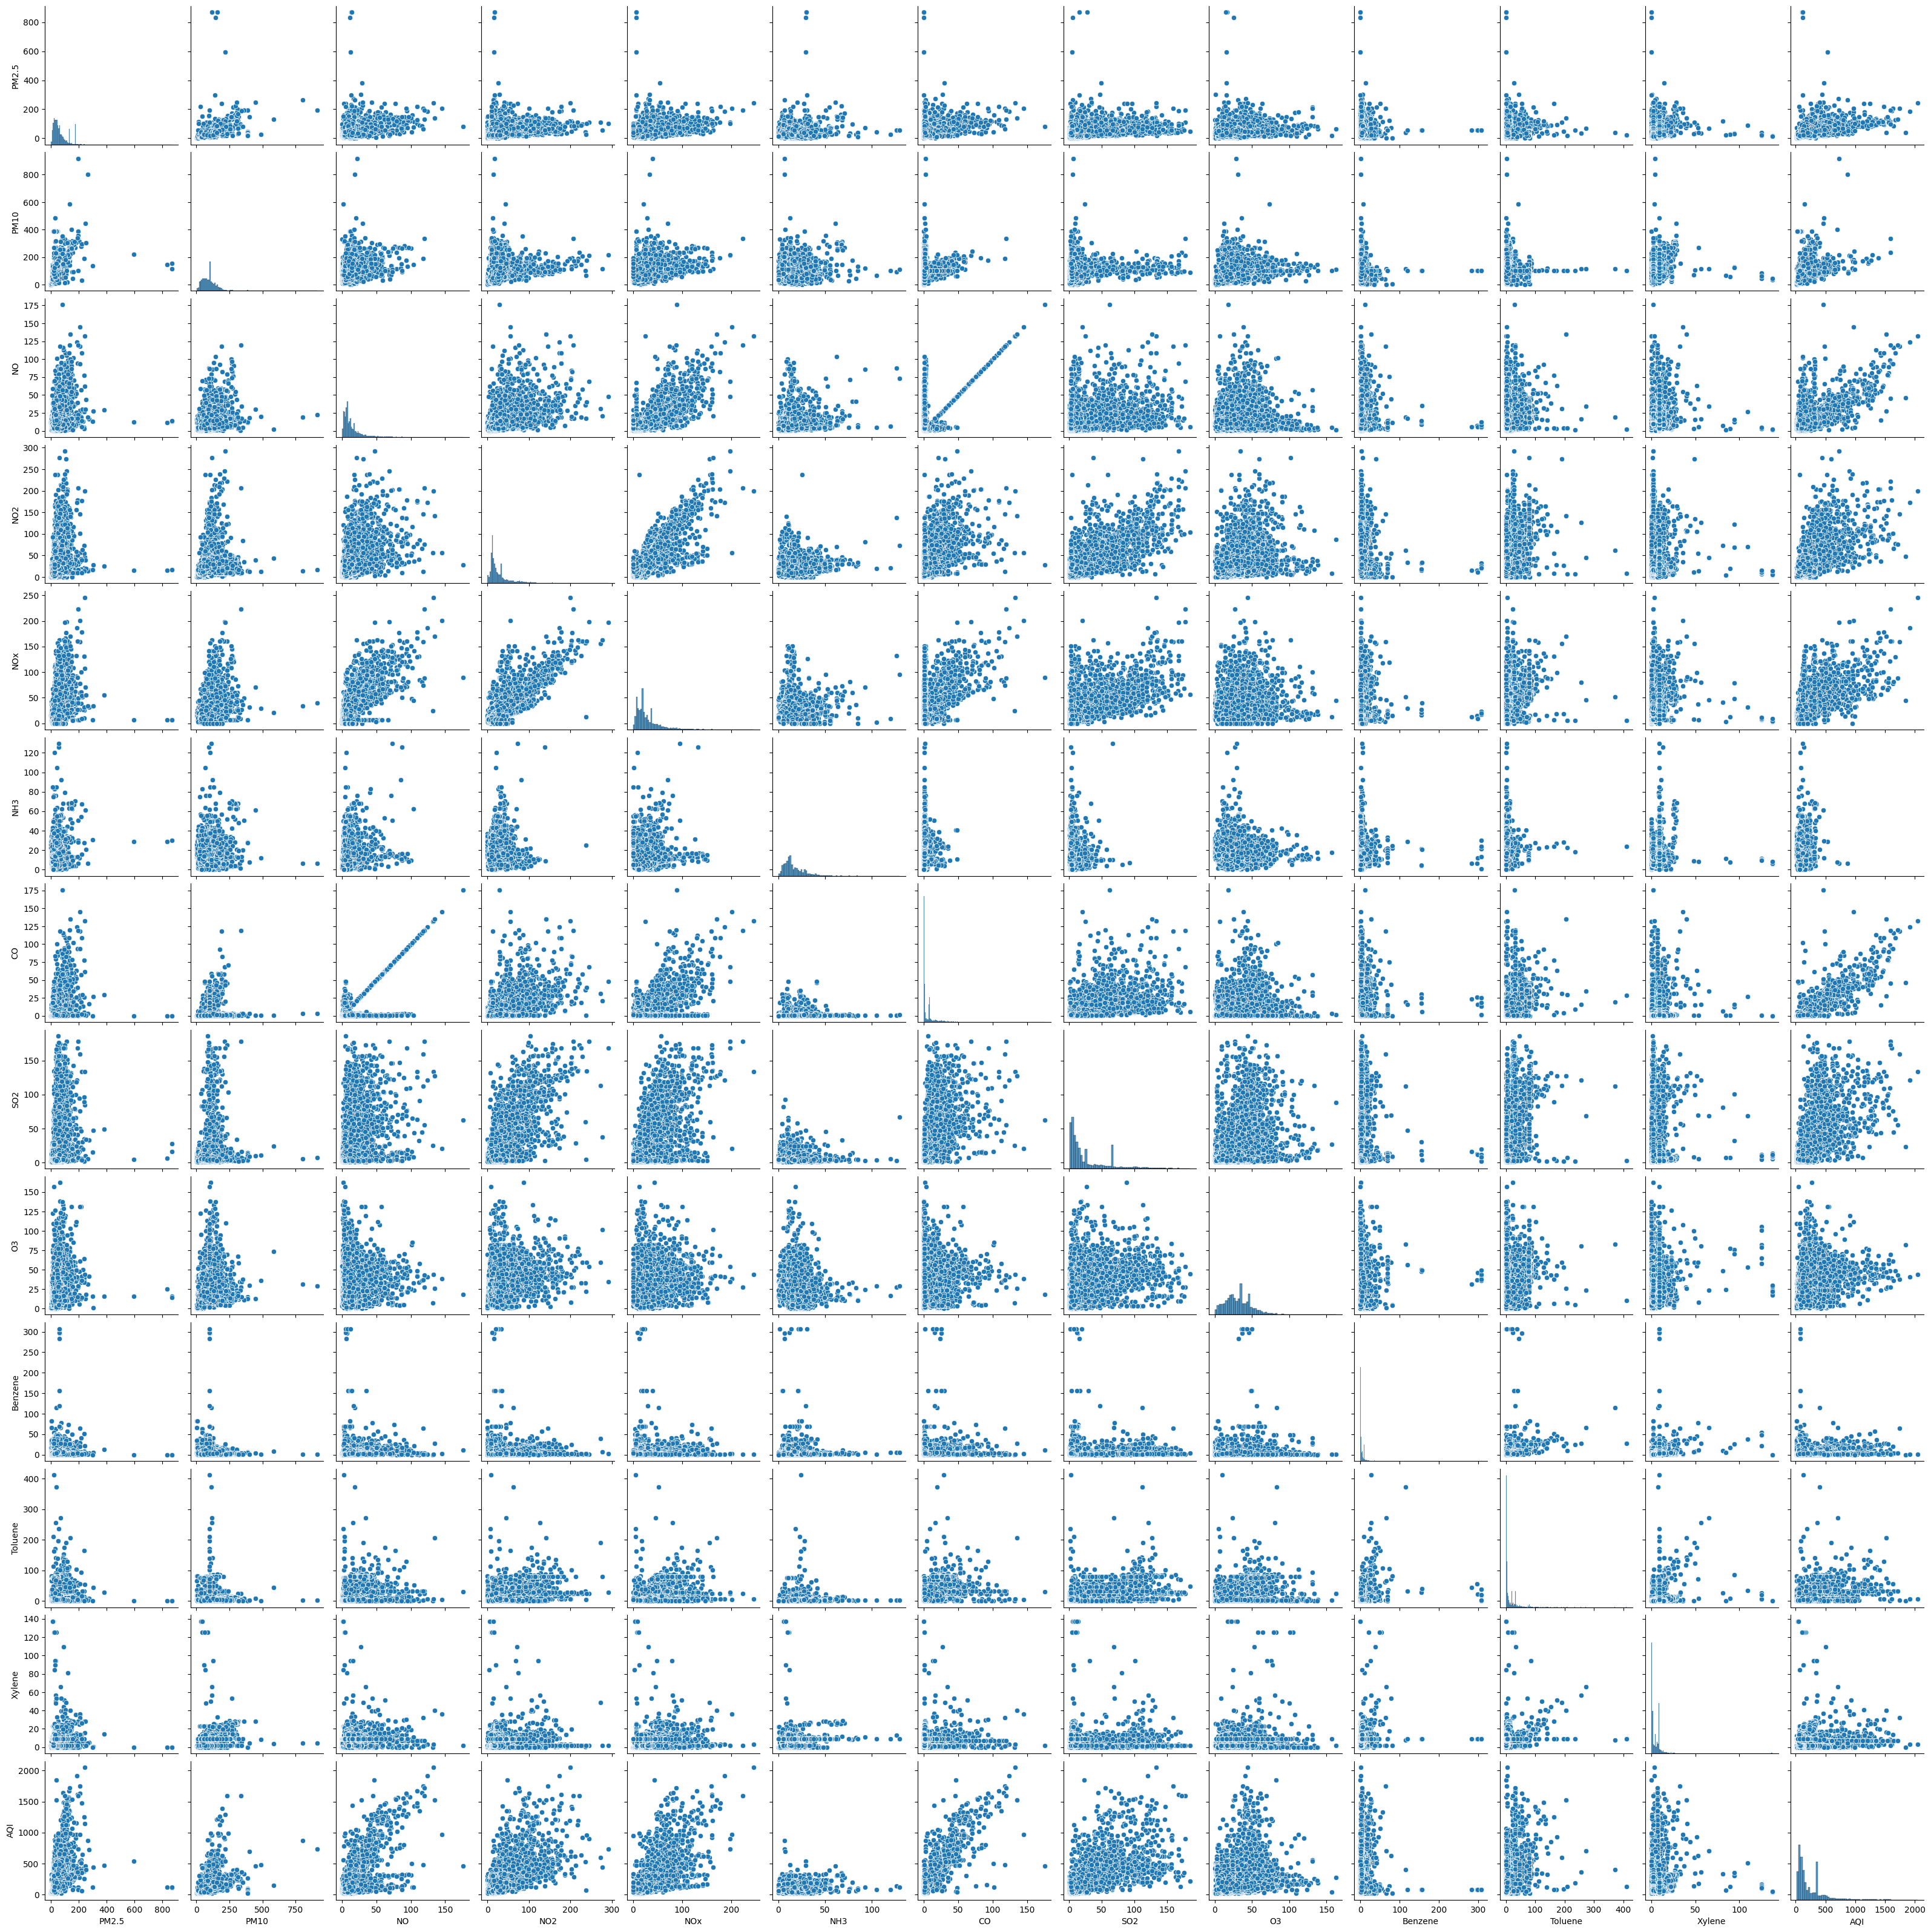

In [9]:
# Select the columns you want to plot
cols_to_plot = ["PM2.5", "PM10" , "NO" ,"NO2" , "NOx"  ,"NH3" , "CO","SO2","O3" ,"Benzene", "Toluene" ,"Xylene", "AQI"]

# Use Seaborn's pairplot function to create the scatter plot matrix
sns.pairplot(df[cols_to_plot])

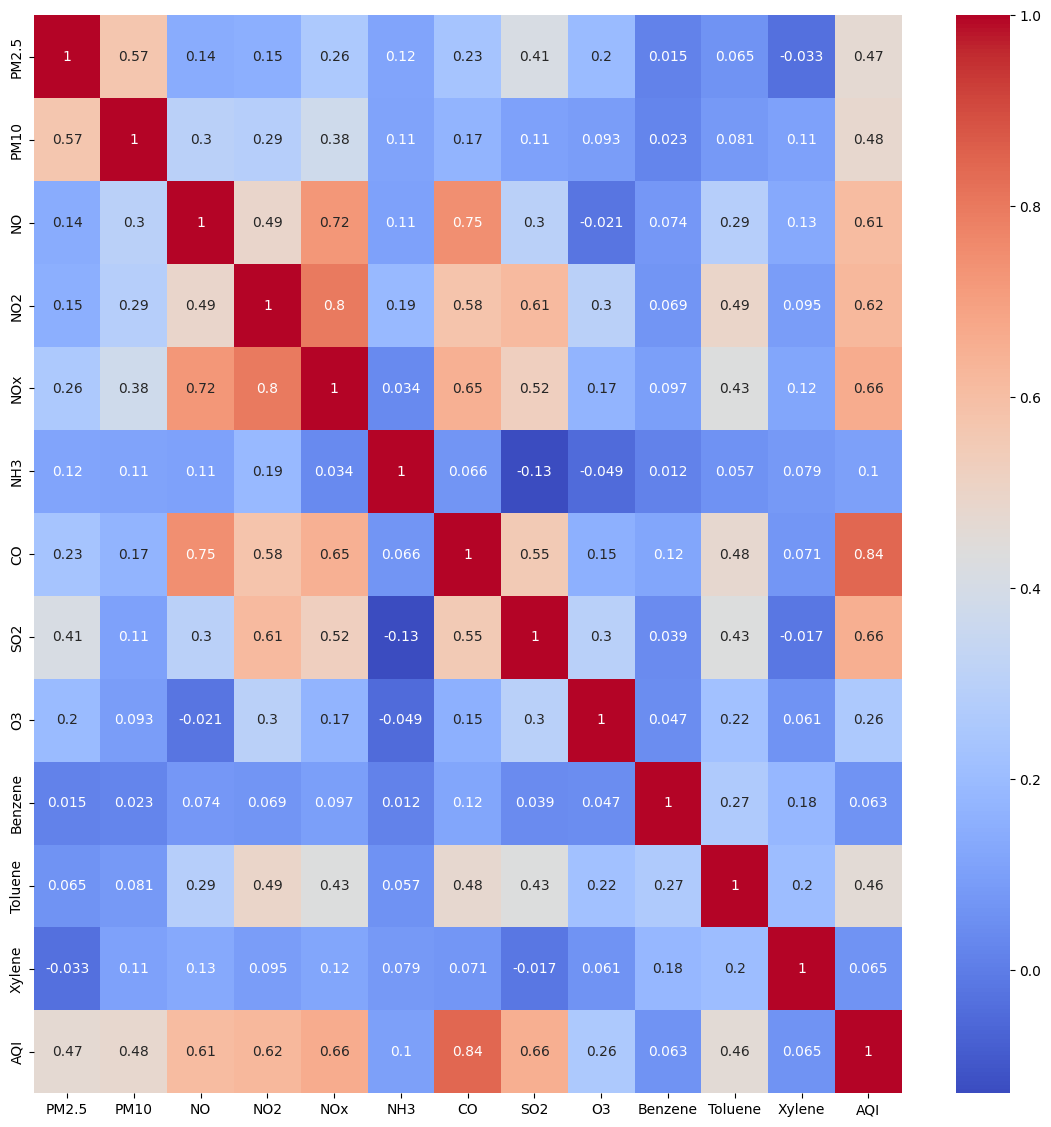

In [10]:
corr_matrix = df.corr(numeric_only=True)
# plot the correlation matrix using seaborn
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

# SPLIT DATA IN TRAINING AND TEST

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

# FEATURING ENGINEERING

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
df_scaled = pd.DataFrame(scaled_data, columns=x.columns)
df_scaled.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,-1.355517e-16,0.0,-0.848217,-0.387518,-0.470294,0.0,-0.464435,0.022459,5.181960,-0.327351,-0.544753,-0.529518,0.0
1,-1.355517e-16,0.0,-0.845021,-0.463182,-0.496707,0.0,-0.461106,-0.074739,0.071205,-0.090303,-0.302359,-0.123090,0.0
2,-1.355517e-16,0.0,0.205128,-0.355219,0.010112,0.0,0.633096,0.067441,-0.101727,0.110672,0.179775,-0.286955,0.0
3,-1.355517e-16,0.0,-0.798362,-0.379743,-0.438905,0.0,-0.412489,-0.262216,0.175170,-0.041992,-0.097120,-0.421712,0.0
4,-1.355517e-16,0.0,0.505536,-0.291818,0.318643,0.0,0.946106,0.390178,0.341411,0.124199,0.289913,-0.229818,0.0


In [13]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    5000 non-null   float64
 1   PM10     5000 non-null   float64
 2   NO       5000 non-null   float64
 3   NO2      5000 non-null   float64
 4   NOx      5000 non-null   float64
 5   NH3      5000 non-null   float64
 6   CO       5000 non-null   float64
 7   SO2      5000 non-null   float64
 8   O3       5000 non-null   float64
 9   Benzene  5000 non-null   float64
 10  Toluene  5000 non-null   float64
 11  Xylene   5000 non-null   float64
 12  AQI      5000 non-null   float64
dtypes: float64(13)
memory usage: 507.9 KB


### PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [15]:
pca.fit(scaled_data)

PCA(n_components=10)

In [16]:
principal_components = pca.transform(scaled_data)
percent_variation = pca.explained_variance_ratio_* 100
print(percent_variation)

[36.73759713 10.46061792  9.49632982  9.30949005  7.15014914  6.6660314
  5.61797067  4.73049336  3.85947623  2.53581935]


In [17]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)

96.5639750837634


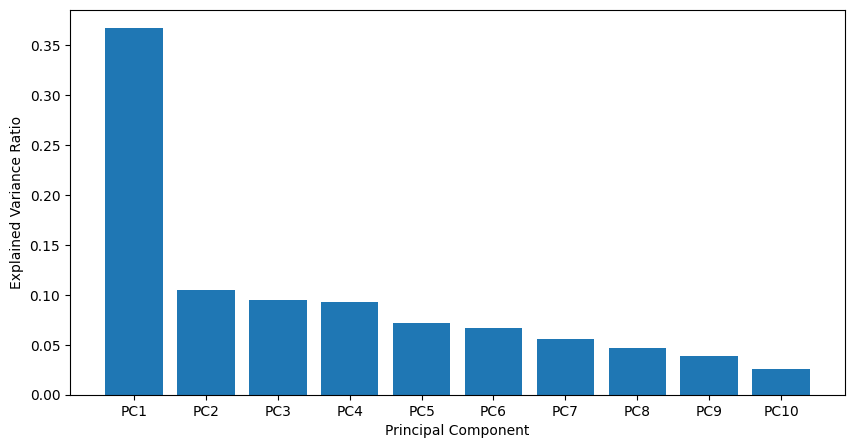

In [18]:
fig = plt.figure(figsize = (10, 5))
plt.bar(np.array(['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']), np.array(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks([0, 1, 2, 3,4,5,6,7,8,9])
plt.show()

In [19]:
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

# CLASSIFIERS

## DECISION TREE CLASSIFIER

In [20]:
dt =DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [21]:
dt=dt.fit(xtrain_pca, ytrain )
pred_dt = dt.predict(xtest_pca)
accuracy = accuracy_score(ytest,pred_dt)
print(accuracy)
print(classification_report(ytest,pred_dt))

0.963
              precision    recall  f1-score   support

        Good       0.96      0.97      0.96        93
    Moderate       0.99      0.94      0.96       232
        Poor       0.92      0.92      0.92        84
Satisfactory       0.95      0.98      0.96       281
      Severe       0.99      0.99      0.99       127
   Very Poor       0.97      0.98      0.98       181
         nan       0.25      0.50      0.33         2

    accuracy                           0.96      1000
   macro avg       0.86      0.90      0.87      1000
weighted avg       0.96      0.96      0.96      1000



## RANDOMFOREST

In [22]:
rc=RandomForestClassifier()
rc

RandomForestClassifier()

In [23]:
rc.fit(xtrain_pca, ytrain)
pred_rc = rc.predict(xtest_pca)
accuracy_rc = accuracy_score(ytest,pred_rc)
print(accuracy_rc)
print(classification_report(ytest,pred_rc))

C:\Users\asus\AppData\Local\Temp\ipykernel_24724\2062208567.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rc.fit(xtrain_pca, ytrain)


0.973
              precision    recall  f1-score   support

        Good       1.00      0.97      0.98        93
    Moderate       0.98      0.96      0.97       232
        Poor       0.95      0.94      0.95        84
Satisfactory       0.96      0.99      0.97       281
      Severe       0.98      1.00      0.99       127
   Very Poor       0.97      0.98      0.98       181
         nan       1.00      0.50      0.67         2

    accuracy                           0.97      1000
   macro avg       0.98      0.90      0.93      1000
weighted avg       0.97      0.97      0.97      1000



## LOGISTIC REGRESSION

In [24]:
lr=LogisticRegression()
lr

LogisticRegression()

In [25]:
lr.fit(xtrain_pca, ytrain)
pred_lr= lr.predict(xtest_pca)
accuracy_lr =accuracy_score(ytest,pred_lr)
print(accuracy_lr)
print(classification_report(ytest,pred_lr))


C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.745
              precision    recall  f1-score   support

        Good       0.59      0.48      0.53        93
    Moderate       0.83      0.53      0.65       232
        Poor       0.91      0.58      0.71        84
Satisfactory       0.64      0.89      0.74       281
      Severe       0.82      0.95      0.88       127
   Very Poor       0.89      0.85      0.87       181
         nan       0.33      1.00      0.50         2

    accuracy                           0.74      1000
   macro avg       0.71      0.76      0.70      1000
weighted avg       0.77      0.74      0.74      1000



##  svm 

In [26]:
sv = svm.SVC()
sv

SVC()

In [27]:
sv.fit(xtrain_pca, ytrain)
pred_sv= sv.predict(xtest_pca)
accuracy_sv =accuracy_score(ytest,pred_sv)
print(accuracy_sv)
print(classification_report(ytest,pred_sv))

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.964
              precision    recall  f1-score   support

        Good       0.99      0.94      0.96        93
    Moderate       0.99      0.92      0.95       232
        Poor       0.96      0.93      0.95        84
Satisfactory       0.92      0.99      0.96       281
      Severe       0.99      1.00      1.00       127
   Very Poor       0.97      0.99      0.98       181
         nan       0.00      0.00      0.00         2

    accuracy                           0.96      1000
   macro avg       0.83      0.82      0.83      1000
weighted avg       0.96      0.96      0.96      1000



C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn
knn.fit(xtrain_pca, ytrain)
pred_knn = dt.predict(xtest_pca)
accuracy_knn = accuracy_score(ytest,pred_knn)
print(accuracy_knn)
print(classification_report(ytest,pred_knn))


0.963
              precision    recall  f1-score   support

        Good       0.96      0.97      0.96        93
    Moderate       0.99      0.94      0.96       232
        Poor       0.92      0.92      0.92        84
Satisfactory       0.95      0.98      0.96       281
      Severe       0.99      0.99      0.99       127
   Very Poor       0.97      0.98      0.98       181
         nan       0.25      0.50      0.33         2

    accuracy                           0.96      1000
   macro avg       0.86      0.90      0.87      1000
weighted avg       0.96      0.96      0.96      1000



C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# #HYPERPARAMETER TUNNING

## DECISION TREE

In [29]:
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'min_samples_split': [2, 3, 4, 5]}

# create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(xtrain_pca, ytrain)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# evaluate the final model on the test data
clf = DecisionTreeClassifier(**grid_search.best_params_)
clf.fit(xtrain_pca, ytrain)
print("Test set score: {:.2f}".format(clf.score(xtest_pca, ytest)))

# perform 10-fold cross-validation and compute the mean accuracy
scores = cross_val_score(dt, xtrain_pca, ytrain, cv=10)
mean_accuracy = scores.mean()
# print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean accuracy: ", mean_accuracy)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
Best score:  0.969
Test set score: 0.96
Cross-validation scores:  [0.9575 0.97   0.9625 0.96   0.96   0.9575 0.955  0.9625 0.97   0.9675]
Mean accuracy:  0.9622499999999998


## LOGISTIC REGRESSION 

In [30]:
# define the grid of hyperparameters to search over
param_grid = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'solver': ['lbfgs', 'liblinear']}

# create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(xtrain_pca, ytrain)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# evaluate the final model on the test set
clf = LogisticRegression(**grid_search.best_params_)
clf.fit(xtrain_pca, ytrain)
score = clf.score(xtest_pca, ytest)
print("Test set score: ", score)

# perform a 5-fold cross-validation
scores = cross_val_score(lr, xtrain_pca, ytrain, cv=5)

# print the cross-validation scores
print("Cross-validation scores: ", scores)

# compute the mean and standard deviation of the cross-validation scores
print("Mean cross-validation score: ", scores.mean())
print("Standard deviation of cross-validation scores: ", scores.std())

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y w

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to c

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\s

Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.8164999999999999


C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\s

Test set score:  0.812
Cross-validation scores:  [0.74625 0.76    0.74    0.74375 0.755  ]
Mean cross-validation score:  0.7489999999999999
Standard deviation of cross-validation scores:  0.007390872749547246


C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

## SVM

In [31]:
# define the grid of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(sv, param_grid=param_grid, cv=5, n_jobs=-1)

# perform hyperparameter tuning and cross-validation
grid_search.fit(xtrain, ytrain)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# evaluate the performance of the best model on a separate test set
best_clf = grid_search.best_estimator_
test_score = np.mean(cross_val_score(best_clf, xtrain,ytrain,cv=5))
print("Test score: ", test_score)

# instantiate the SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

# instantiate the KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(svm, xtrain, ytrain, cv=kf)

# print the cross-validation scores
print("Cross-validation scores:", scores)

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best score:  0.99125


C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Test score:  0.99125


C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Cross-validation scores: [0.99    0.98375 0.9875  0.98875 0.98625]


## KNN

In [32]:
# define the parameter grid to search over
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
# create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
# fit the GridSearchCV object to the data
grid_search.fit(xtrain_pca, ytrain)
# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# create KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(knn, xtrain_pca, ytrain, cv=kf)

# print the cross-validation scores
print("Cross-validation scores:", scores)

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Best hyperparameters:  {'n_neighbors': 5}
Best score:  0.93675
Cross-validation scores: [0.93625 0.9425  0.93375 0.9275  0.94   ]


C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## RANDOM FOREST

In [33]:
# create a Random Forest classifier object
rc = RandomForestClassifier(random_state=42)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rc, param_grid=param_grid, cv=5)
grid_search.fit(xtrain_pca, ytrain)

# print the best hyperparameters and their score on the validation set
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# create a KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(rc, xtrain_pca, ytrain, cv=kf)

# print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score:  0.9724999999999999


C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\WIMAPPLY\python 3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

Cross-validation scores: [0.98    0.9675  0.97125 0.9675  0.97625]
Mean cross-validation score: 0.9725000000000001


In [38]:
# Select the columns you want to plot
cols_to_plot_pca = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10",axis==1]

# Use Seaborn's pairplot function to create the scatter plot matrix
sns.pairplot(df[cols_to_plot_pca])

NameError: name 'axis' is not defined